<a href="https://colab.research.google.com/github/Augusto-Seixas-UFV/seixas-ufv-iac/blob/main/Panorama_do_D%C3%B3lar_Turismo_na_Grande_Vit%C3%B3ria_%E2%80%93_Tend%C3%AAncias%2C_Cota%C3%A7%C3%B5es_e_Estrat%C3%A9gias_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

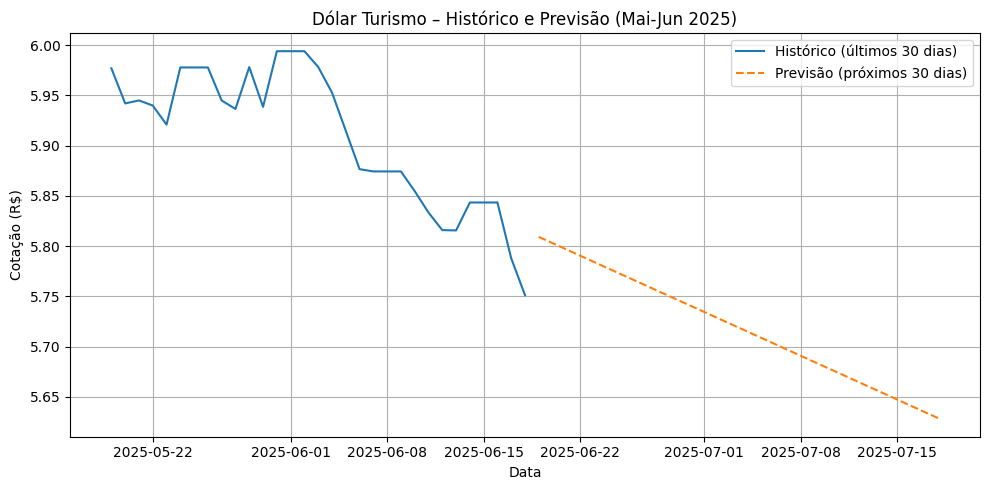

In [1]:
# --- bibliotecas usadas -----------------------------------------------------
import pandas as pd                  # manipulação tabular
import matplotlib.pyplot as plt       # visualização
from datetime import datetime         # datas seriadas
from sklearn.linear_model import LinearRegression  # regressão OLS simples

# --- 1. série histórica -----------------------------------------------------
data = [
    ("2025-05-19", 5.9771), ("2025-05-20", 5.9421), ("2025-05-21", 5.9451),
    ("2025-05-22", 5.9400), ("2025-05-23", 5.9210), ("2025-05-24", 5.9779),
    ("2025-05-25", 5.9779), ("2025-05-26", 5.9779), ("2025-05-27", 5.9450),
    ("2025-05-28", 5.9366), ("2025-05-29", 5.9783), ("2025-05-30", 5.9387),
    ("2025-05-31", 5.9941), ("2025-06-01", 5.9941), ("2025-06-02", 5.9941),
    ("2025-06-03", 5.9784), ("2025-06-04", 5.9529), ("2025-06-05", 5.9149),
    ("2025-06-06", 5.8767), ("2025-06-07", 5.8744), ("2025-06-08", 5.8744),
    ("2025-06-09", 5.8744), ("2025-06-10", 5.8548), ("2025-06-11", 5.8335),
    ("2025-06-12", 5.8160), ("2025-06-13", 5.8157), ("2025-06-14", 5.8435),
    ("2025-06-15", 5.8435), ("2025-06-16", 5.8435), ("2025-06-17", 5.7879),
    ("2025-06-18", 5.7512),
]
hist_df = pd.DataFrame(data, columns=["date", "rate"])
hist_df["date"] = pd.to_datetime(hist_df["date"])

# --- 2. preparação para regressão ------------------------------------------
# convertendo datas para valor numérico absoluto (ordinal)
hist_df["ordinal"] = hist_df["date"].map(datetime.toordinal)

# ajuste do modelo: taxa ~ dia
model = LinearRegression().fit(
    hist_df[["ordinal"]],        # X
    hist_df["rate"]              # y
)

# --- 3. construindo janela futura de 30 dias --------------------------------
future_dates = pd.date_range(
    start=hist_df["date"].max() + pd.Timedelta(days=1),
    periods=30,
    freq="D"
)
future_df = pd.DataFrame({"date": future_dates})
future_df["ordinal"] = future_df["date"].map(datetime.toordinal)

# previsão usando o modelo treinado
future_df["pred_rate"] = model.predict(future_df[["ordinal"]])

# --- 4. plot final ----------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(hist_df["date"], hist_df["rate"],
         label="Histórico (últimos 30 dias)")
plt.plot(future_df["date"], future_df["pred_rate"], linestyle="--",
         label="Previsão (próximos 30 dias)")
plt.title("Dólar Turismo – Histórico e Previsão (Mai-Jun 2025)")
plt.xlabel("Data")
plt.ylabel("Cotação (R$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
